In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import make_blobs

In [42]:
x, y = make_blobs(n_features=2, n_samples=1000, centers=3)

In [43]:
x

array([[  0.32076783,   5.72738175],
       [ -5.91172953,  -3.28450013],
       [  0.48641222,   7.74348971],
       ...,
       [ -6.10565899,  -4.9054176 ],
       [ -1.90494763, -11.07262912],
       [ -1.17233308,  -8.06199083]], shape=(1000, 2))

In [44]:
y

array([2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1,
       0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0, 1,
       2, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2,
       2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1,
       2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1,
       1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1,
       2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 2,
       2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2,

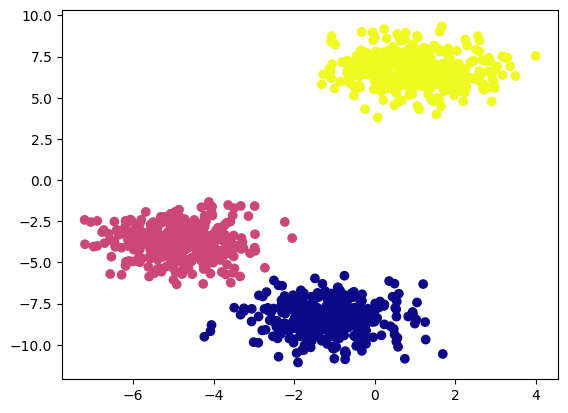

In [45]:
### Visualize the data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='plasma')

In [46]:
### Train - Test Splt
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [47]:
### Standardized the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_train)

In [49]:
### K Means

from sklearn.cluster import KMeans

In [50]:
### Elbow method To select K Value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)

In [51]:
wcss

[1340.0,
 391.59016841177436,
 113.94232857242959,
 89.40973771702555,
 87.58972942948014,
 51.813827348411145,
 61.37482144118224,
 40.326702166153446,
 36.818083903706025,
 32.813270164108125]

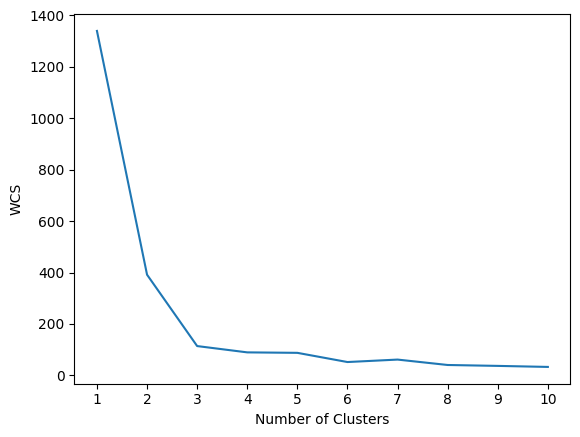

In [52]:
### Plot Elbow Curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCS")
plt.show()

In [53]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [54]:
kmeans.fit_predict(x_train_scaled)

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1,
       2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1,
       0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1,
       1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2,
       2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0,
       2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0,

In [55]:
y_pred = kmeans.predict(x_test_scaled)

In [56]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1,
       2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 1,
       0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1,
       1, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2,
       1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 1, 0, 0, 0, 1, 2,
       1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2,
       2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0,
       2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0,

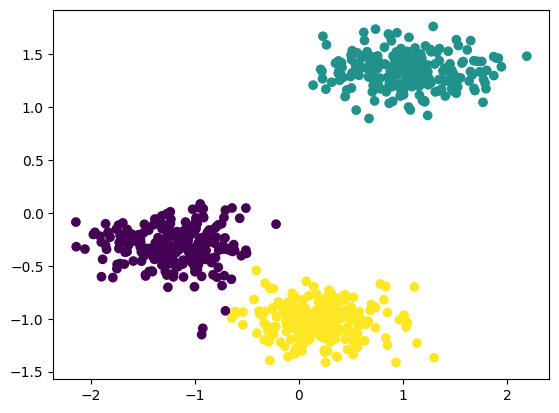

In [57]:
plt.scatter(x_test_scaled[:,0], x_test_scaled[:,1], c=y_pred)

### Validating the K Value
1. KneeLocator
2. Silhoute scoring

In [58]:
### kneelocator
!pip install kneed

In [59]:
from kneed import KneeLocator

In [60]:
kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')

In [61]:
kl.elbow

np.int64(3)

In [62]:
### Silhoute score
from sklearn.metrics import silhouette_score

In [63]:
silhouette_coeff = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled, kmeans.labels_)
    silhouette_coeff.append(score)

In [64]:
silhouette_coeff

[np.float64(0.6708907446344968),
 np.float64(0.7186588501121566),
 np.float64(0.6090367111778532),
 np.float64(0.5084180454582329),
 np.float64(0.46585999447084064),
 np.float64(0.40832308316182797),
 np.float64(0.40447718606978367),
 np.float64(0.4038898945463497),
 np.float64(0.3768640872092956)]